In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pyseir import load_data

In [2]:
base_path_new = '/Users/natashawoods/Desktop/later/covid_act_now/covid-data-model/output/web_ui'
base_path_old = '/Users/natashawoods/Desktop/later/covid_act_now/covid-data-model/output/web_ui_master'
comparison_cols = [(8, 'current_icu'), (10, 'all_infected'), (11,'dead'), (12, 'beds')]

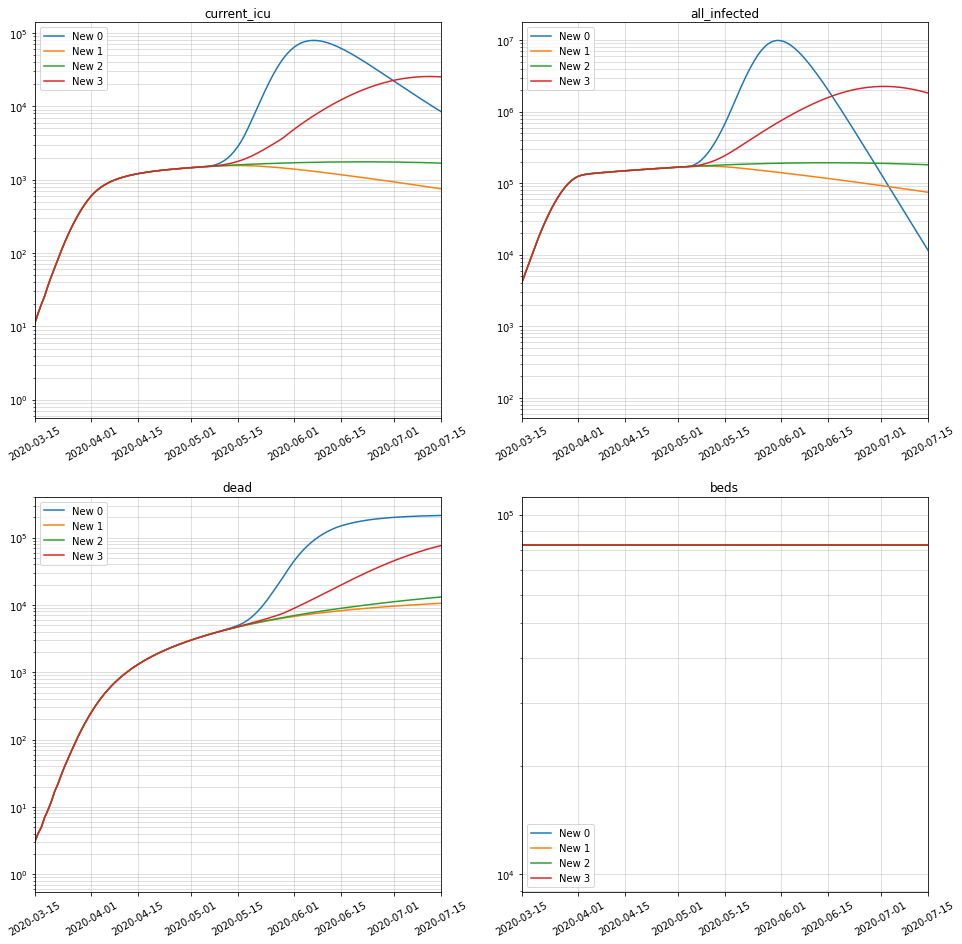

In [16]:
for state in ('CA',):
    plt.figure(figsize=(16, 16))
    plt.title(state)
    
    for i_plt, (col, compartment) in enumerate(comparison_cols):                     
        plt.subplot(2, 2, i_plt + 1)
        for i in range(4):
            color = list(plt.rcParams['axes.prop_cycle'])[i]['color']
            df_new = pd.read_json(os.path.join(base_path_new, f'state/{state}.{i}.json'), convert_dates=[1])                      
            plt.plot(df_new[1] - datetime.timedelta(days=1), df_new[col], label=f'New {i}', color=color)
            plt.legend()

        plt.xlim(datetime.datetime.strptime('3/15/2020', '%m/%d/%Y'), datetime.datetime.strptime('7/15/2020', '%m/%d/%Y'))
        _ = plt.xticks(rotation=30)
        plt.grid(True, which='both', alpha=.5)
        plt.title(compartment)
        plt.yscale('log')
        